# Import the required libraries 


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

# Loading the data 



In [37]:
labels = ['spiral', 'elliptical','cluster','irregular']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                
                print(e)
    return np.array(data)

In [38]:
train = get_data('F:/project/Gala_image/train_data')
test = get_data('F:/project/Gala_image/test_data')

<ipython-input-37-2873c58e7a52>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


# Visualize the data 


C:\Users\shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

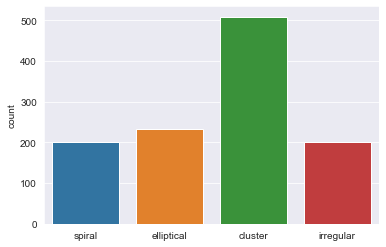

In [39]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("spiral")
    elif(i[1] == 1):
        l.append("elliptical")
    elif(i[1]==2):
        l.append("cluster")
    else:
        l.append("irregular")
sns.set_style('darkgrid')
sns.countplot(l)

# Visualize a random image


Text(0.5, 1.0, 'spiral')

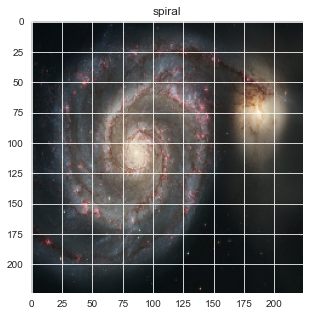

In [40]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'spiral')

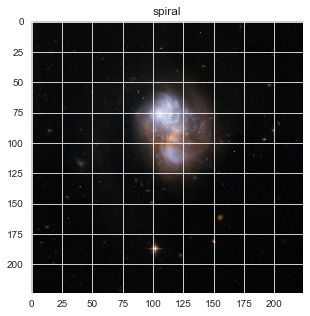

In [41]:
plt.figure(figsize = (5,5))
plt.imshow(train[25][0])
plt.title(labels[train[25][1]])

Text(0.5, 1.0, 'irregular')

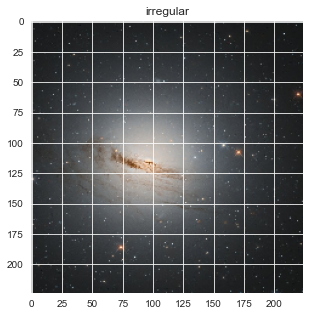

In [42]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

# Data Preprocessing and Data Augmentation



In [43]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in test:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data

x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [44]:
x_train.shape,y_train.shape

((1145, 224, 224, 3), (1145,))

# Data augmentation on the train data

In [45]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.4, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# CNN 


In [46]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())


model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(4, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 64)       

In [47]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [48]:
history = history = model.fit(x_train,y_train,epochs = 20, validation_data = (x_val, y_val))

Epoch 1/20
36/36 [==============================] - 51s 1s/step - loss: 1.1990 - accuracy: 0.4757 - val_loss: 0.9887 - val_accuracy: 0.5611
Epoch 2/20
36/36 [==============================] - 46s 1s/step - loss: 0.9374 - accuracy: 0.6114 - val_loss: 0.9421 - val_accuracy: 0.6109
Epoch 3/20
36/36 [==============================] - 46s 1s/step - loss: 0.9187 - accuracy: 0.6490 - val_loss: 0.8469 - val_accuracy: 0.6742
Epoch 4/20
36/36 [==============================] - 46s 1s/step - loss: 0.8372 - accuracy: 0.6488 - val_loss: 0.8125 - val_accuracy: 0.7195
Epoch 5/20
36/36 [==============================] - 49s 1s/step - loss: 0.8219 - accuracy: 0.7056 - val_loss: 0.7437 - val_accuracy: 0.7104
Epoch 6/20
36/36 [==============================] - 52s 1s/step - loss: 0.7219 - accuracy: 0.7281 - val_loss: 0.7433 - val_accuracy: 0.7104
Epoch 7/20
36/36 [==============================] - 56s 2s/step - loss: 0.7288 - accuracy: 0.7362 - val_loss: 0.6458 - val_accuracy: 0.7647
Epoch 8/20
36/36 [==

In [53]:
history

# plot our training and validation accuracy along with training and validation loss.

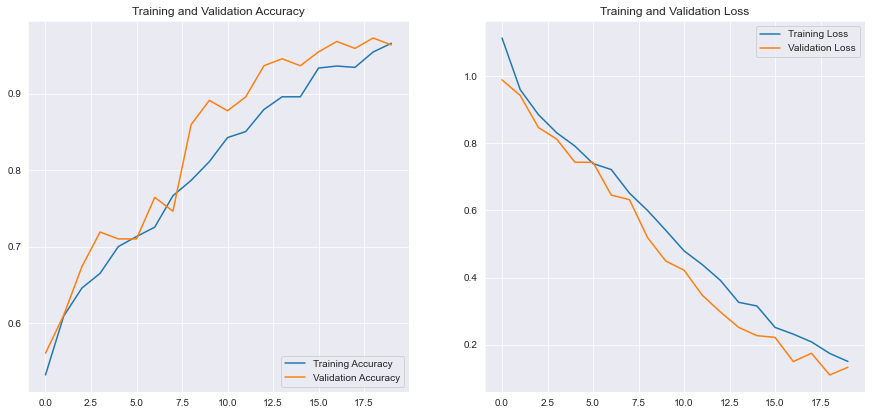

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# classification report to see the precision and accuracy.




# Test Precisioion and Accuracy

In [55]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['spiral (Class 0)','elliptical (Class 1)','cluster (Class 2)','irregular (Class 3)']))

                      precision    recall  f1-score   support

    spiral (Class 0)       0.94      0.96      0.95        48
elliptical (Class 1)       1.00      0.89      0.94        46
   cluster (Class 2)       1.00      0.99      0.99        85
 irregular (Class 3)       0.89      1.00      0.94        42

            accuracy                           0.96       221
           macro avg       0.96      0.96      0.96       221
        weighted avg       0.97      0.96      0.96       221



# Train Precisioion and Accuracy

In [56]:
predictions = model.predict_classes(x_train)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_train, predictions, target_names = ['spiral (Class 0)','elliptical (Class 1)','cluster (Class 2)','irregular (Class 3)']))

                      precision    recall  f1-score   support

    spiral (Class 0)       0.95      0.97      0.96       202
elliptical (Class 1)       0.98      0.92      0.95       232
   cluster (Class 2)       0.99      0.98      0.98       509
 irregular (Class 3)       0.93      0.98      0.95       202

            accuracy                           0.97      1145
           macro avg       0.96      0.96      0.96      1145
        weighted avg       0.97      0.97      0.97      1145



In [62]:
score,acc=model.evaluate(x_val,y_val,verbose=1)
print("test score is {}".format(score))
print("test score is {}".format(acc))


7/7 [==============================] - 2s 251ms/step - loss: 0.1332 - accuracy: 0.9638
test score is 0.13322919607162476
test score is 0.9638009071350098


In [63]:
score,acc=model.evaluate(x_train,y_train,verbose=1)
print("test score is {}".format(score))
print("test score is {}".format(acc))


36/36 [==============================] - 9s 255ms/step - loss: 0.1346 - accuracy: 0.9668
test score is 0.13457392156124115
test score is 0.966812252998352


# Transfer Learning

In [28]:
# Import the model
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

In [29]:
base_model.trainable = False

In [30]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.4),
                                 tf.keras.layers.Dense(1, activation="softmax")                                     
                                ])

In [31]:
base_learning_rate = 0.00004
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [32]:
history = model.fit(x_train,y_train,epochs = 15, validation_data = (x_val, y_val))

Epoch 1/15
36/36 [==============================] - 45s 1s/step - loss: -1.6619 - accuracy: 0.2117 - val_loss: -7.3552 - val_accuracy: 0.2081
Epoch 2/15
36/36 [==============================] - 36s 992ms/step - loss: -11.2302 - accuracy: 0.1939 - val_loss: -14.9285 - val_accuracy: 0.2081
Epoch 3/15
36/36 [==============================] - 35s 982ms/step - loss: -18.0416 - accuracy: 0.1914 - val_loss: -22.6372 - val_accuracy: 0.2081
Epoch 4/15
36/36 [==============================] - 35s 983ms/step - loss: -28.4769 - accuracy: 0.2110 - val_loss: -30.5030 - val_accuracy: 0.2081
Epoch 5/15
36/36 [==============================] - 35s 984ms/step - loss: -34.8388 - accuracy: 0.2128 - val_loss: -38.5227 - val_accuracy: 0.2081
Epoch 6/15
36/36 [==============================] - 35s 988ms/step - loss: -47.9198 - accuracy: 0.2001 - val_loss: -46.6439 - val_accuracy: 0.2081
Epoch 7/15
36/36 [==============================] - 35s 989ms/step - loss: -52.9091 - accuracy: 0.2248 - val_loss: -54.5679

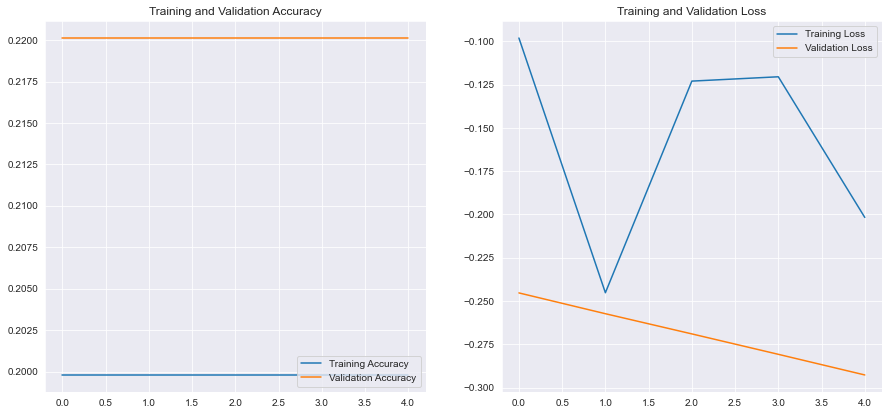

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_val, predictions, target_names = ['spiral (Class 0)','elliptical (Class 1)','irregular (Class 2)','cluster (Class 3)']))

                      precision    recall  f1-score   support

    spiral (Class 0)       0.00      0.00      0.00        29
elliptical (Class 1)       0.22      1.00      0.36        35
 irregular (Class 2)       0.00      0.00      0.00        69
   cluster (Class 3)       0.00      0.00      0.00        26

            accuracy                           0.22       159
           macro avg       0.06      0.25      0.09       159
        weighted avg       0.05      0.22      0.08       159

